In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
names = 'Aim Mindubayeva, Ablaikhan Aimbetov, Tima Kotov'

In [6]:
names_list = names.split(',')

In [ ]:
medium_35 = df.query('wealth == "medium" and age>35') #pretty easy tasks for repeating some bases

In [ ]:
df['older_than_30'] = df['age'] > 30 

In [ ]:
unique_num = df.nunique() #searching for uniques

In [ ]:
full_data = pd.merge(data, df, how='inner', on=['client_id'])

In [21]:
def read_n_agg(path):
    df = pd.read_csv(path, sep=';')
    return df.groupby('company').agg({'income': 'mean'}) #adding some function

In [24]:
read_n_agg('C:\\Users\\aimbe\\Downloads\\3_companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


In [29]:
df_taxi = pd.read_csv(r'C:\Users\aimbe\Downloads\3_taxi_peru.csv'\
                      , encoding = 'Windows-1251', sep = ';', parse_dates = ['start_at', 'end_at', 'arrived_at'])

In [31]:
df_taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [37]:
total_journeys = df_taxi['journey_id'].count()

In [43]:
df_taxi\
    .groupby('source')\
    .agg({'journey_id':'count'}).mul(100)/total_journeys

,journey_id
source,
Android,21.240968
Wap,0.588464
iPad,2.470685
iPhone,42.148760
web,33.018909


In [35]:
9741/23111

0.4214876033057851

In [45]:
driver_score_counts = (
df_taxi.driver_score
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'})
    .sort_values('driver_score')
)

In [46]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


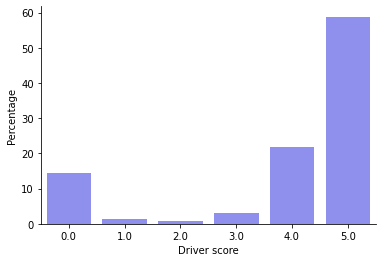

In [52]:
ax = sns.barplot(x=driver_score_counts['driver_score'], y=driver_score_counts['percentage'], data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  
plt.show()